In [6]:
from context import bowman
from bowman import triangulation
from triangulation import Triangulation
from bowman import unfolding
from bowman import rational_ht_application

# Square Torus

In [3]:
X = Triangulation.square_torus()
X.generators_veech

ValueError: Can (so far) only build halfplane between two interior points

In [2]:
w = 9

In [3]:
X = Triangulation.prym_eigenform_type_aplus(w, 1, 0, 0)
gens = X.generators_veech.gens

In [4]:
shear_horiz = next(gen for gen in gens
                   if gen[0][0]== 1
                   if gen[1][0] == 0
                   if gen[0][1] > 0)
shear_vert = next(gen for gen in gens
                   if gen[0][0]== 1
                   if gen[0][1] == 0
                   if gen[1][0] > 0)
shear_horiz, shear_vert

(
[1 9]  [         1          0]
[0 1], [1/18*a + 1          1]
)

# Gothic Locus

In [5]:
def num_ideal_vertices(r):
    return sum(edge.start == oo or edge.start.v2 == 0 for edge in r.polygon)

In [6]:
G = unfolding.triangulate_gothic1119(QQ(-1/4))
cx = G.iso_delaunay_complex(300)
any(num_ideal_vertices(r) > 1 for r in cx)

False

# D = 8

In [3]:
prym8 = Triangulation.prym_eigenform_type_b_disc_8()

In [13]:
shear_horiz = [[1, 1], [0, 1]]

In [9]:
constraints_dict = rational_ht_application.segments_for_plotting(rational_ht_application.bicuspid_segments(prym8))

Completed triangulation.


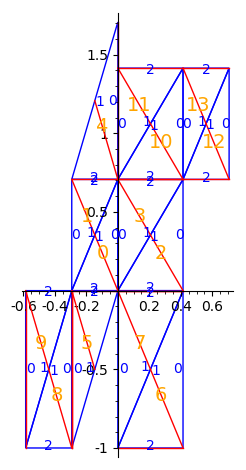

In [11]:
prym8_con = prym8.plot_constraints(constraints_dict)
prym8_con.plot().show()

In [12]:
def mark_points(trin, points_set, rgbcolor=(0, 0, 0)):
    trin_copy = trin
    for tri_id, pt_coords in points_set:
        trin_copy = trin_copy.mark_point(tri_id, pt_coords, rgbcolor)
    return trin_copy

In [14]:
candidate_points = set()
for i in range(len(prym8.triangles)):
    tri_points = prym8.compute_candidate_periodic_points(i, shear_horiz)
    for point in tri_points:
        reformatted = (i, point)
        candidate_points.add(reformatted)

AttributeError: 'Triangulation' object has no attribute 'compute_candidate_periodic_points'